In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/GTerrence/dataset/main/wine.csv')
df

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [43]:
df.isna().sum()
#Tidak ada missing value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
target_counts=df['quality'].value_counts()
print(target_counts)

#dataset baik

quality
1    855
0    744
Name: count, dtype: int64


In [45]:
# vergood = {'good':'1','bad':'0'}
# df['quality'] = df['quality'].map(vergood)
# df

In [46]:
# one-hot encode the 'color' column
# df_encoded = pd.get_dummies(df, columns=['color'])

# print(df_encoded)

In [51]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['quality'] = encoder.fit_transform(df['quality'])
df.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [52]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 32)

In [57]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1
 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0
 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1
 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0]


In [59]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:{:0.4f}".format(accuracy))

Confusion Matrix
 [[118  47]
 [ 71 164]]
Accuracy Score:0.7050


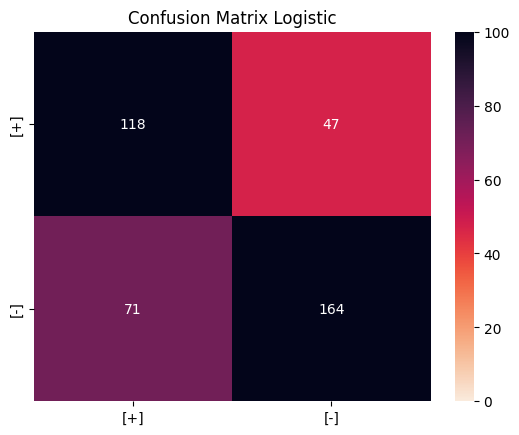

In [60]:
custom_palette = sns.color_palette("rocket_r", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', vmin=0, vmax=100, cmap=custom_palette)

tick_labels = ['[+]', '[-]']
plt.xticks([0.5, 1.5], tick_labels)
plt.yticks([0.5, 1.5], tick_labels)
plt.title('Confusion Matrix Logistic')
plt.show()

# Membuat model klasifikasi dengan menggunakan KNeighborsClassifier, gunakan n_neighbors = 2 dan metric euclidean

In [61]:
classifier = KNeighborsClassifier(n_neighbors=2,metric="euclidean", p= 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

# Prediksi pada X_test

In [62]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0]


In [63]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0]


# Menghitung akurasi dari model regresi

In [64]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:{:0.4f}".format(accuracy))

Confusion Matrix
 [[134  31]
 [128 107]]
Accuracy Score:0.6025


In [ ]:
# Menampilkan confusion matrix dari model dengan menggunakan heatmap:
       ## - Ubah tickslabels dari sumbu x dan y dengan tanda [+] dan [-] sesuai confusion matrix
    ##    - Atur vmin = 0 dan vmax = 100

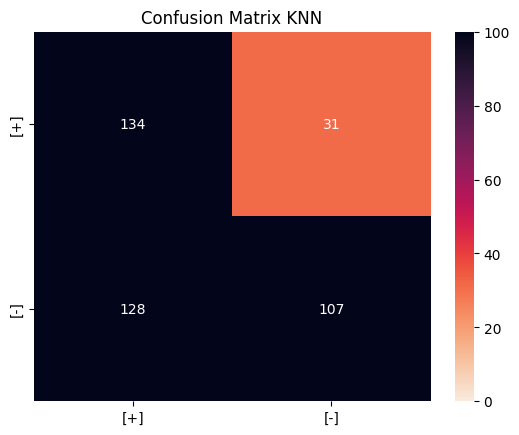

In [65]:
custom_palette = sns.color_palette("rocket_r", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', vmin=0, vmax=100, cmap=custom_palette)

tick_labels = ['[+]', '[-]']
plt.xticks([0.5, 1.5], tick_labels)
plt.yticks([0.5, 1.5], tick_labels)
plt.title('Confusion Matrix KNN')
plt.show()

In [79]:
# Create the ID3 decision tree model
id3_tree = DecisionTreeClassifier(criterion="entropy")
id3_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = id3_tree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ID3 Decision Tree: {accuracy * 100:.2f}%")



Accuracy of the ID3 Decision Tree: 71.75%
